In [ ]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv('nn_done_data_40000.csv')

# Menampilkan informasi dasar dari data
print("Informasi Data:")
print(df.info())

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35159 entries, 0 to 35158
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   data_text        35159 non-null  object 
 1   clean_text       35159 non-null  object 
 2   translated_text  35159 non-null  object 
 3   subjektivitas    35159 non-null  float64
 4   polaritas        35159 non-null  float64
 5   sentimen         35159 non-null  object 
 6   label            35159 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.9+ MB
None


## Permodelan Label Sentimen

sentimen                           negatif  positif
label                                              
Interaksi dengan Platform YouTube      450     6122
Pengaruh Global Ronaldo                171     3802
Respon Emosional Penggemar             532    14599
Unlabeled                              381     9102


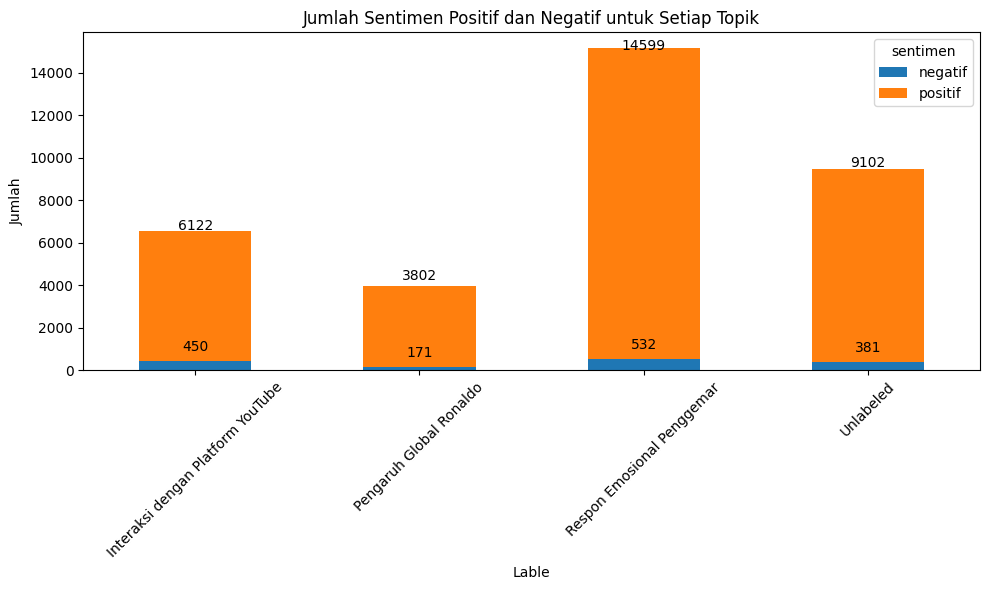

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Contoh data (ganti dengan data Anda)
# df = pd.read_csv('done_data_40000_clear.csv')

# Mengelompokkan data berdasarkan label dan sentimen
grouped = df.groupby(['label', 'sentimen']).size().unstack(fill_value=0)

# Menampilkan hasil perhitungan sentimen positif dan negatif pada setiap topik
print(grouped)

# Visualisasi dalam bentuk bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Menambahkan anotasi jumlah di atas setiap batang dengan format bilangan bulat
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Mengubah tinggi menjadi bilangan bulat
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Sentimen Positif dan Negatif untuk Setiap Topik')
plt.xlabel('Lable')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Contoh data (sesuaikan dengan dataset Anda)
# df = pd.read_csv('done_data_40000_clear.csv')

# Mengubah teks menjadi fitur menggunakan CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['translated_text'])  # Asumsi kolom teks berisi teks untuk analisis sentimen
y = df['sentimen']  # Kolom label berisi label sentimen (misal: positif, negatif)

# Fungsi untuk membuat model Naive Bayes dengan persentase data latih tertentu
def train_naive_bayes_model(train_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Akurasi dengan {train_size*100}% data latih: {accuracy:.4f}")
    return model

# Melatih model dengan 70%, 80%, dan 90% data latih
model_70 = train_naive_bayes_model(0.7)
model_80 = train_naive_bayes_model(0.8)
model_90 = train_naive_bayes_model(0.9)


Akurasi dengan 70.0% data latih: 0.9535
Akurasi dengan 80.0% data latih: 0.9529
Akurasi dengan 90.0% data latih: 0.9562


In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Mengubah teks menjadi fitur menggunakan CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['translated_text'])  # Asumsi kolom teks berisi teks untuk analisis sentimen
y = df['sentimen']  # Kolom label berisi label sentimen (misal: positif, negatif)

# Fungsi untuk melatih model dan menguji akurasi
def train_test_model(test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Akurasi untuk data latih {100 - (test_size * 100)}% : {accuracy * 100:.2f}%')
    print(classification_report(y_test, y_pred))

# Gunakan 80% data latih
train_test_model(0.30)  # 80% data latih


Akurasi untuk data latih 70.0% : 95.35%
              precision    recall  f1-score   support

     negatif       0.46      0.24      0.32       472
     positif       0.97      0.99      0.98     10076

    accuracy                           0.95     10548
   macro avg       0.71      0.62      0.65     10548
weighted avg       0.94      0.95      0.95     10548



Akurasi MultinomialNB untuk data latih 70.0% : 95.35%
Laporan Klasifikasi MultinomialNB:
              precision    recall  f1-score   support

     negatif       0.46      0.24      0.32       472
     positif       0.97      0.99      0.98     10076

    accuracy                           0.95     10548
   macro avg       0.71      0.62      0.65     10548
weighted avg       0.94      0.95      0.95     10548

Confusion Matrix MultinomialNB:
[[ 115  357]
 [ 134 9942]]


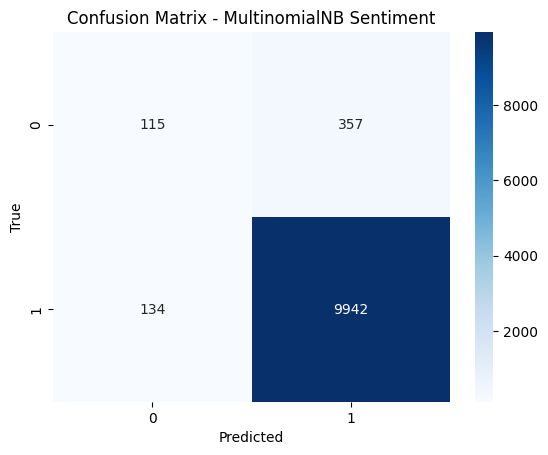

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm

# Assuming df is the DataFrame containing your data
# Example: df = pd.read_csv('your_dataset.csv')

# Mengubah teks menjadi fitur menggunakan CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['translated_text'])  # Asumsi kolom teks berisi teks untuk analisis sentimen
y = df['sentimen']  # Kolom label berisi label sentimen (misal: positif, negatif)

# Fungsi untuk melatih model dan menguji akurasi
def train_test_model(test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # MultinomialNB model
    model_nb = MultinomialNB()
    model_nb.fit(X_train, y_train)

    # Prediksi hasil
    y_pred_nb = model_nb.predict(X_test)

    # Akurasi MultinomialNB
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    print(f'Akurasi MultinomialNB untuk data latih {100 - (test_size * 100)}% : {accuracy_nb * 100:.2f}%')

    # Classification report for MultinomialNB
    print("Laporan Klasifikasi MultinomialNB:")
    print(classification_report(y_test, y_pred_nb))

    # Confusion matrix for MultinomialNB
    cm_nb = confusion_matrix(y_test, y_pred_nb)
    print("Confusion Matrix MultinomialNB:")
    print(cm_nb)

    # Visualisasi Confusion Matrix
    sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - MultinomialNB Sentiment')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Gunakan 80% data latih
train_test_model(0.30)  # 80% data latih


## Permodelan Lebel Topik

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Contoh data (sesuaikan dengan dataset Anda)
# df = pd.read_csv('done_data_40000_clear.csv')

# Mengubah teks menjadi fitur menggunakan CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['translated_text'])  # Asumsi kolom teks berisi teks untuk analisis sentimen
y = df['label']  # Kolom label berisi label sentimen (misal: positif, negatif)

# Fungsi untuk membuat model Naive Bayes dengan persentase data latih tertentu
def train_naive_bayes_model(train_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Akurasi dengan {train_size*100}% data latih: {accuracy:.4f}")
    return model

# Melatih model dengan 70%, 80%, dan 90% data latih
model_70 = train_naive_bayes_model(0.7)
model_80 = train_naive_bayes_model(0.8)
model_90 = train_naive_bayes_model(0.9)

Akurasi dengan 70.0% data latih: 0.7734
Akurasi dengan 80.0% data latih: 0.7836
Akurasi dengan 90.0% data latih: 0.7847


In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Mengubah teks menjadi fitur menggunakan CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['translated_text'])  # Asumsi kolom teks berisi teks untuk analisis sentimen
y = df['label']  # Kolom label berisi label sentimen (misal: positif, negatif)

# Fungsi untuk melatih model dan menguji akurasi
def train_test_model(test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Akurasi untuk data latih {100 - (test_size * 100)}% : {accuracy * 100:.2f}%')
    print(classification_report(y_test, y_pred))

# Gunakan 80% data latih
train_test_model(0.20)  # 80% data latih


Akurasi untuk data latih 80.0% : 78.36%
                                   precision    recall  f1-score   support

Interaksi dengan Platform YouTube       0.78      0.78      0.78      1306
          Pengaruh Global Ronaldo       0.83      0.43      0.57       788
       Respon Emosional Penggemar       0.73      0.97      0.83      3039
                        Unlabeled       0.95      0.64      0.76      1899

                         accuracy                           0.78      7032
                        macro avg       0.82      0.70      0.74      7032
                     weighted avg       0.81      0.78      0.77      7032



Akurasi MultinomialNB untuk data latih 80.0% : 78.36%
Laporan Klasifikasi MultinomialNB:
                                   precision    recall  f1-score   support

Interaksi dengan Platform YouTube       0.78      0.78      0.78      1306
          Pengaruh Global Ronaldo       0.83      0.43      0.57       788
       Respon Emosional Penggemar       0.73      0.97      0.83      3039
                        Unlabeled       0.95      0.64      0.76      1899

                         accuracy                           0.78      7032
                        macro avg       0.82      0.70      0.74      7032
                     weighted avg       0.81      0.78      0.77      7032

Confusion Matrix MultinomialNB:
[[1014   19  258   15]
 [  53  340  378   17]
 [  54   11 2946   28]
 [ 177   42  470 1210]]


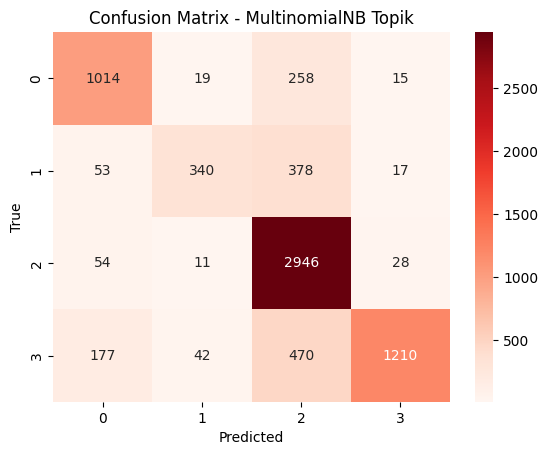

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm

# Assuming df is the DataFrame containing your data
# Example: df = pd.read_csv('your_dataset.csv')

# Mengubah teks menjadi fitur menggunakan CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['translated_text'])  # Asumsi kolom teks berisi teks untuk analisis sentimen
y = df['label']  # Kolom label berisi label sentimen (misal: positif, negatif)

# Fungsi untuk melatih model dan menguji akurasi
def train_test_model(test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # MultinomialNB model
    model_nb = MultinomialNB()
    model_nb.fit(X_train, y_train)

    # Prediksi hasil
    y_pred_nb = model_nb.predict(X_test)

    # Akurasi MultinomialNB
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    print(f'Akurasi MultinomialNB untuk data latih {100 - (test_size * 100)}% : {accuracy_nb * 100:.2f}%')

    # Classification report for MultinomialNB
    print("Laporan Klasifikasi MultinomialNB:")
    print(classification_report(y_test, y_pred_nb))

    # Confusion matrix for MultinomialNB
    cm_nb = confusion_matrix(y_test, y_pred_nb)
    print("Confusion Matrix MultinomialNB:")
    print(cm_nb)

    # Visualisasi Confusion Matrix
    sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Reds')
    plt.title('Confusion Matrix - MultinomialNB Topik')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Gunakan 80% data latih
train_test_model(0.20)  # 80% data latih


Akurasi untuk data latih 80.0% : 78.36%
Laporan Klasifikasi:
                                   precision    recall  f1-score   support

Interaksi dengan Platform YouTube       0.78      0.78      0.78      1306
          Pengaruh Global Ronaldo       0.83      0.43      0.57       788
       Respon Emosional Penggemar       0.73      0.97      0.83      3039
                        Unlabeled       0.95      0.64      0.76      1899

                         accuracy                           0.78      7032
                        macro avg       0.82      0.70      0.74      7032
                     weighted avg       0.81      0.78      0.77      7032

Confusion Matrix:
[[1014   19  258   15]
 [  53  340  378   17]
 [  54   11 2946   28]
 [ 177   42  470 1210]]


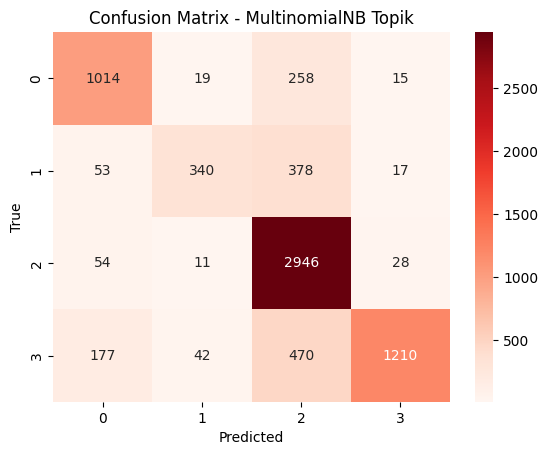

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Mengubah teks menjadi fitur menggunakan CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['translated_text'])  # Asumsi kolom teks berisi teks untuk analisis sentimen
y = df['label']  # Kolom label berisi label sentimen (misal: positif, negatif, dll.)

# Fungsi untuk melatih model dan menguji akurasi
def train_test_model(test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # MultinomialNB model
    model = MultinomialNB()
    model.fit(X_train, y_train)
    
    # Prediksi hasil
    y_pred = model.predict(X_test)
    
    # Akurasi model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Akurasi untuk data latih {100 - (test_size * 100)}% : {accuracy * 100:.2f}%')
    
    # Laporan Klasifikasi
    print("Laporan Klasifikasi:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # If binary classification, unpack values
    if cm.shape == (2, 2):
        TN, FP, FN, TP = cm.ravel()
        print(f"True Positives (TP): {TP}")
        print(f"False Positives (FP): {FP}")
        print(f"False Negatives (FN): {FN}")
        print(f"True Negatives (TN): {TN}")
    
    # Visualisasi Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title('Confusion Matrix - MultinomialNB Topik')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Gunakan 80% data latih
train_test_model(0.20)  # 80% data latih


## Visualisaasi Hasil Sentimen

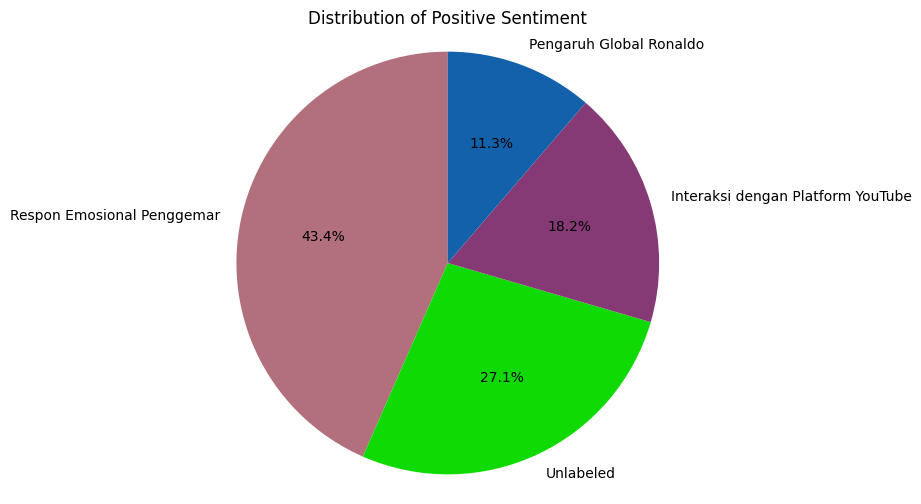

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame for 'positif' sentiment
negatif_data = df[df['sentimen'] == 'positif']  # Adjusted to filter for 'positif'

# Count the occurrences of each label in the positif_data
label_counts = negatif_data['label'].value_counts()

# Generate random colors
colors = np.random.rand(len(label_counts), 3)  # Generate random RGB colors

# Visualize the distribution with a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Positive Sentiment')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()


## Visualisasi Hasil Topik

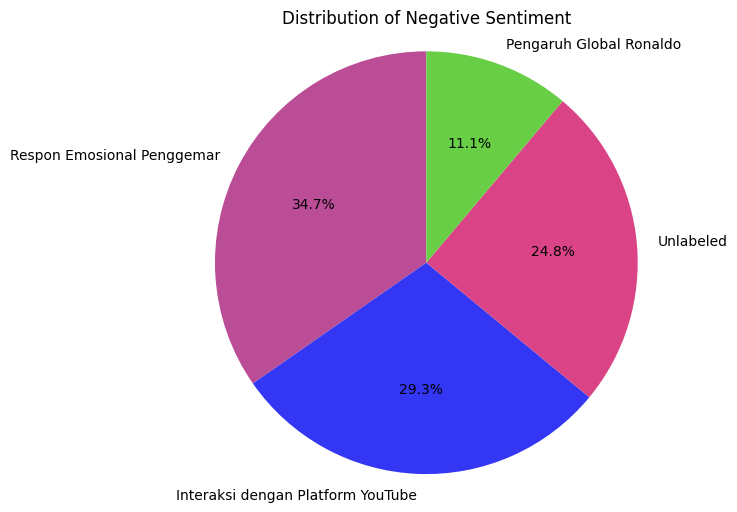

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame for 'positif' sentiment
negatif_data = df[df['sentimen'] == 'negatif']  # Adjusted to filter for 'positif'

# Count the occurrences of each label in the positif_data
label_counts = negatif_data['label'].value_counts()

# Generate random colors
colors = np.random.rand(len(label_counts), 3)  # Generate random RGB colors

# Visualize the distribution with a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Negative Sentiment')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bayuk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bayuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


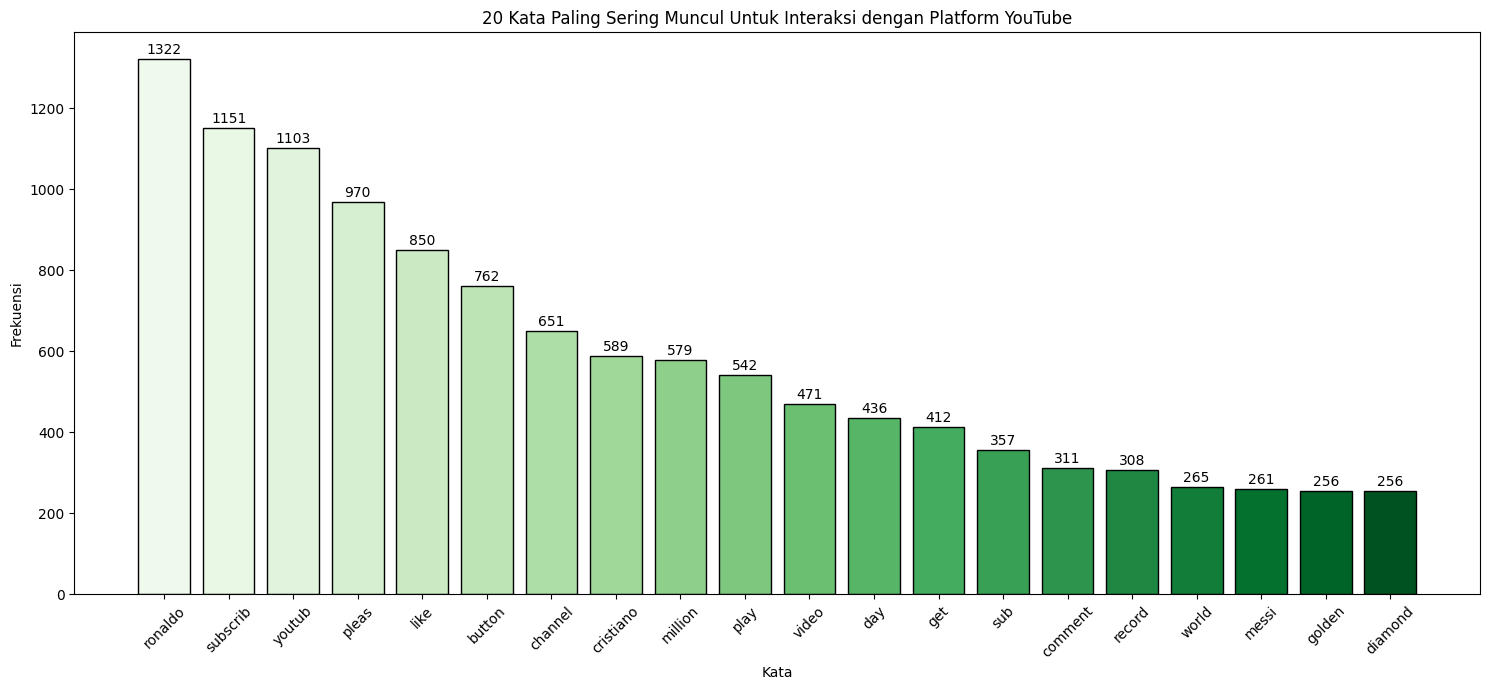

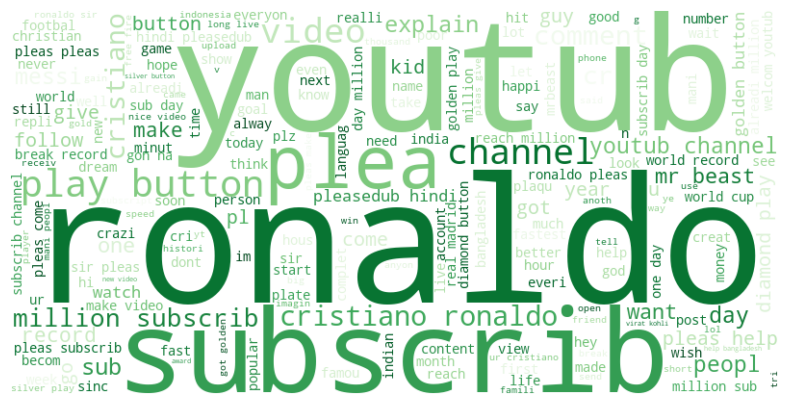

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sns
import re
from nltk import download

# Download NLTK resources (run this once)
download('punkt')
download('stopwords')

# 1. Membaca data
df = pd.read_csv('nn_done_data_40000.csv')

# 2. Filter data hanya untuk label "Interaksi dengan Platform YouTube"
df = df[df['label'] == 'Interaksi dengan Platform YouTube']

# 3. Preprocessing Teks
def preprocess_text(text):
    # - Case Folding
    text = text.lower()
    # - Pembersihan Data: Menghapus simbol dan angka
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Apply preprocessing to the translated_text column
df['cleaned_text'] = df['translated_text'].apply(preprocess_text)

# - Tokenization
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

# - Menggunakan stopwords bahasa Inggris
stop_words = set(stopwords.words('english'))

# - Membuang stop words
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# - Stemming
stemmer = PorterStemmer()
df['stemmed'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

# - Menggabungkan kembali menjadi string
df['final_text'] = df['stemmed'].apply(lambda x: ' '.join(x))

# 4. Menghitung frekuensi kata
text = ' '.join(df['final_text'])
words = re.findall(r'\w+', text)
word_counts = Counter(words)

# 5. Bar Chart untuk 10 kata paling sering muncul
# Set the color palette (sequential color map)
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(15, 7))
bars = plt.bar(words, counts, color=sns.color_palette("Greens", len(words)), edgecolor='black')

# Annotate bars with frequency values on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

# Customize the plot
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('20 Kata Paling Sering Muncul Untuk Interaksi dengan Platform YouTube')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

# 6. Membuat Word Cloud dengan warna dasar hijau
# Fungsi untuk mengubah warna kata menjadi hijau
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bayuk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bayuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


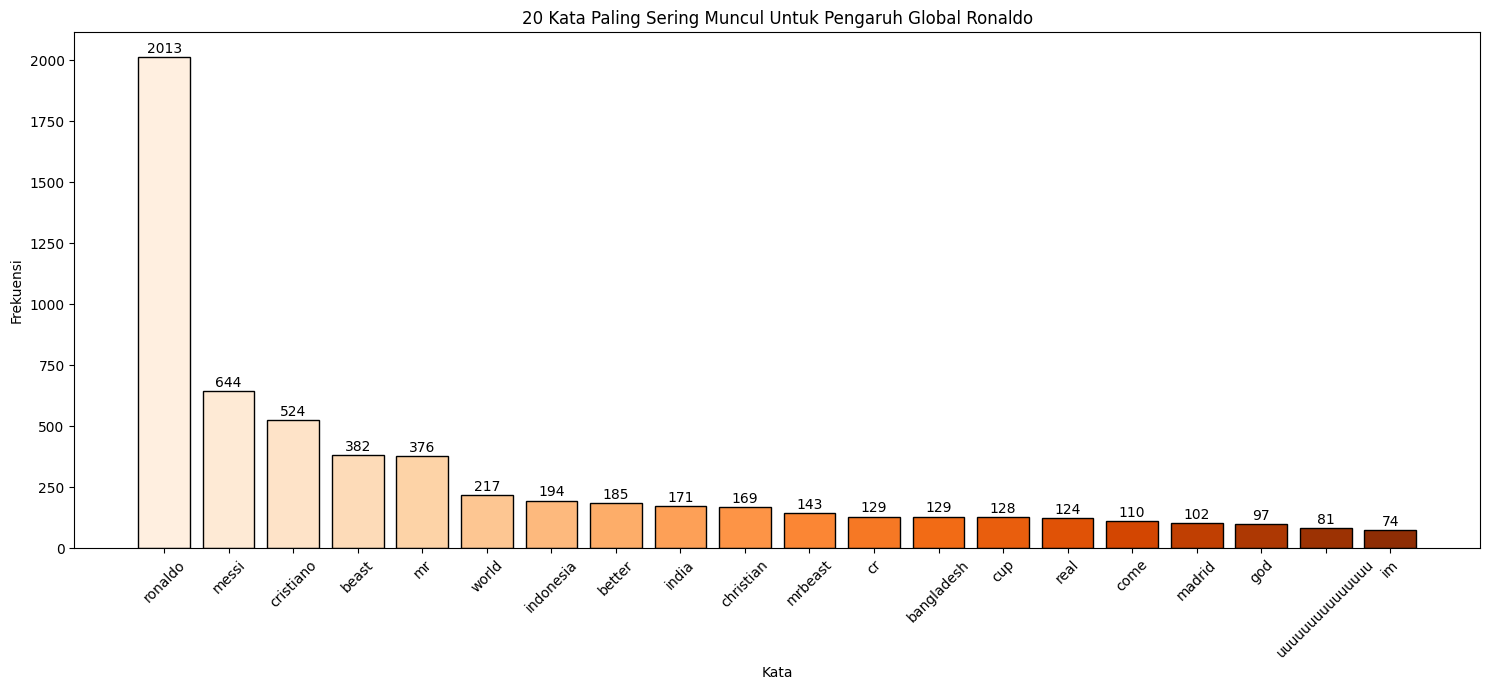

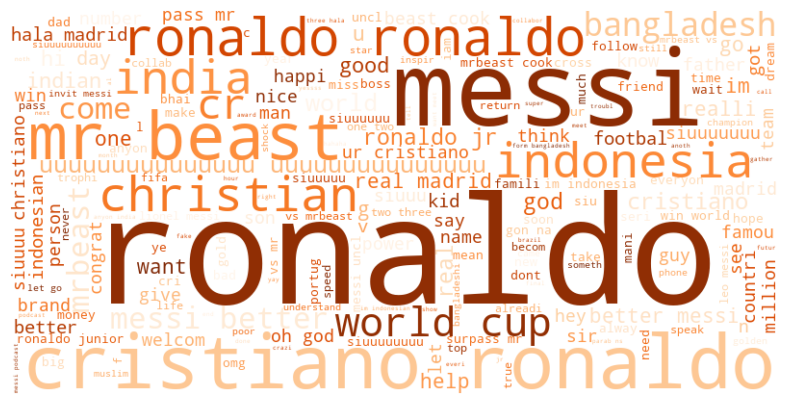

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
from nltk import download

# Download NLTK resources (run this once)
download('punkt')
download('stopwords')

# 1. Membaca data
df = pd.read_csv('nn_done_data_40000.csv')

# 2. Filter data hanya untuk label "Interaksi dengan Platform YouTube"
df = df[df['label'] == 'Pengaruh Global Ronaldo']

# 3. Preprocessing Teks
def preprocess_text(text):
    # - Case Folding
    text = text.lower()
    # - Pembersihan Data: Menghapus simbol dan angka
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Apply preprocessing to the translated_text column
df['cleaned_text'] = df['translated_text'].apply(preprocess_text)

# - Tokenization
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

# - Menggunakan stopwords bahasa Inggris
stop_words = set(stopwords.words('english'))

# - Membuang stop words
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# - Stemming
stemmer = PorterStemmer()
df['stemmed'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

# - Menggabungkan kembali menjadi string
df['final_text'] = df['stemmed'].apply(lambda x: ' '.join(x))

# 4. Menghitung frekuensi kata
text = ' '.join(df['final_text'])
words = re.findall(r'\w+', text)
word_counts = Counter(words)

# 5. Bar Chart untuk 10 kata paling sering muncul
# Set the color palette (sequential color map)
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(15, 7))
bars = plt.bar(words, counts, color=sns.color_palette("Oranges", len(words)), edgecolor='black')

# Annotate bars with frequency values on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

# Customize the plot
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('20 Kata Paling Sering Muncul Untuk Pengaruh Global Ronaldo')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

# 6. Membuat Word Cloud dengan warna dasar hijau
# Fungsi untuk mengubah warna kata menjadi hijau
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Oranges').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bayuk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bayuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


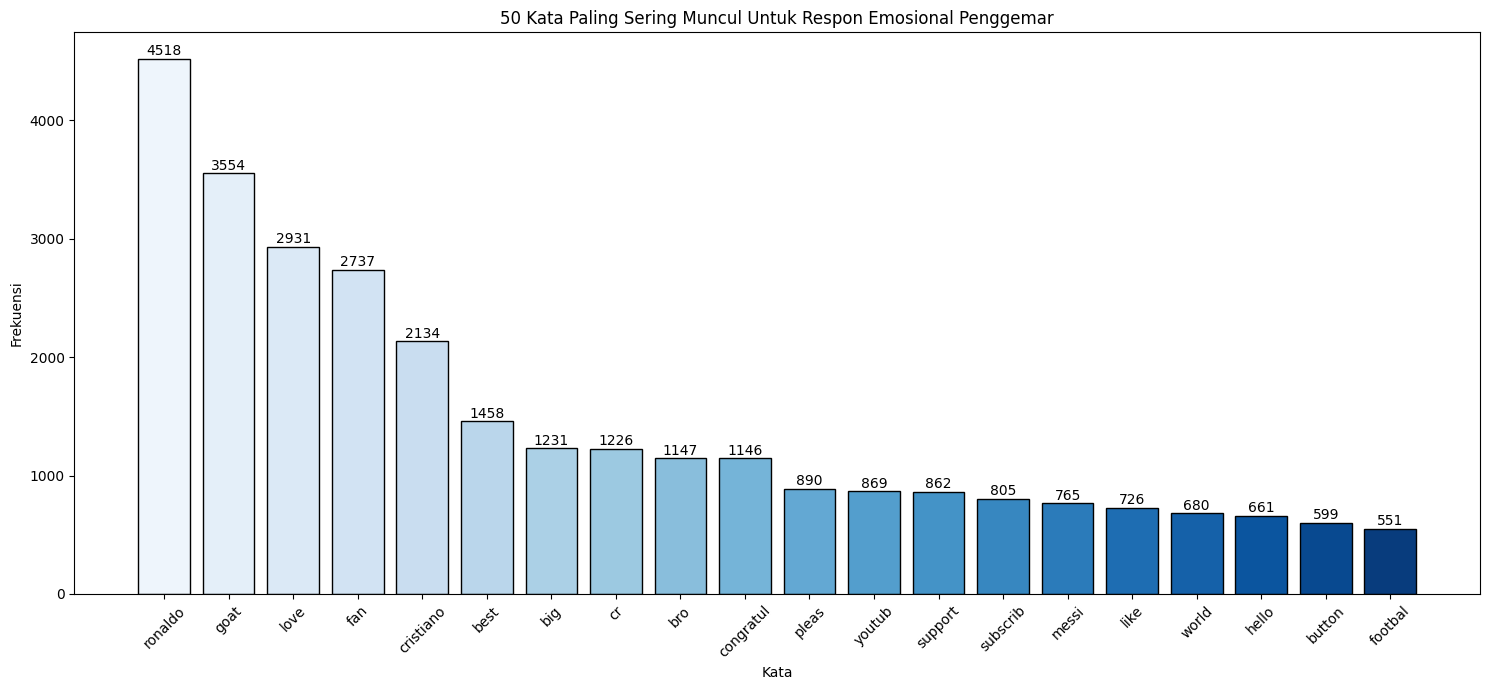

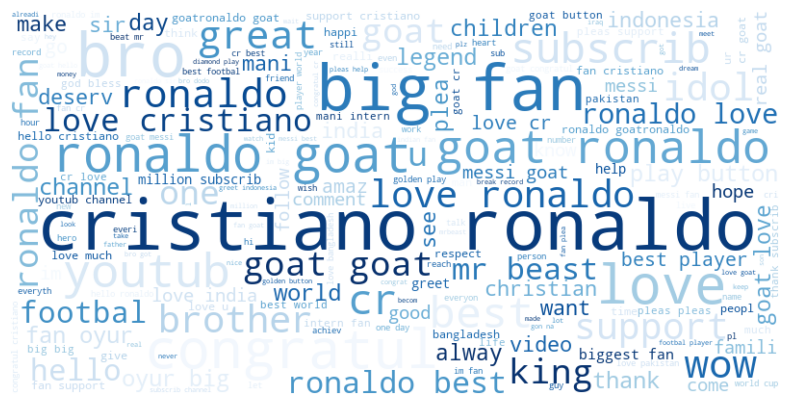

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
from nltk import download

# Download NLTK resources (run this once)
download('punkt')
download('stopwords')

# 1. Membaca data
df = pd.read_csv('nn_done_data_40000.csv')

# 2. Filter data hanya untuk label "Interaksi dengan Platform YouTube"
df = df[df['label'] == 'Respon Emosional Penggemar']

# 3. Preprocessing Teks
def preprocess_text(text):
    # - Case Folding
    text = text.lower()
    # - Pembersihan Data: Menghapus simbol dan angka
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Apply preprocessing to the translated_text column
df['cleaned_text'] = df['translated_text'].apply(preprocess_text)

# - Tokenization
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

# - Menggunakan stopwords bahasa Inggris
stop_words = set(stopwords.words('english'))

# - Membuang stop words
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# - Stemming
stemmer = PorterStemmer()
df['stemmed'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

# - Menggabungkan kembali menjadi string
df['final_text'] = df['stemmed'].apply(lambda x: ' '.join(x))

# 4. Menghitung frekuensi kata
text = ' '.join(df['final_text'])
words = re.findall(r'\w+', text)
word_counts = Counter(words)

# 5. Bar Chart untuk 10 kata paling sering muncul
# Set the color palette (sequential color map)
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(15, 7))
bars = plt.bar(words, counts, color=sns.color_palette("Blues", len(words)), edgecolor='black')

# Annotate bars with frequency values on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

# Customize the plot
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('50 Kata Paling Sering Muncul Untuk Respon Emosional Penggemar')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

# 6. Membuat Word Cloud dengan warna dasar hijau
# Fungsi untuk mengubah warna kata menjadi hijau
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bayuk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bayuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


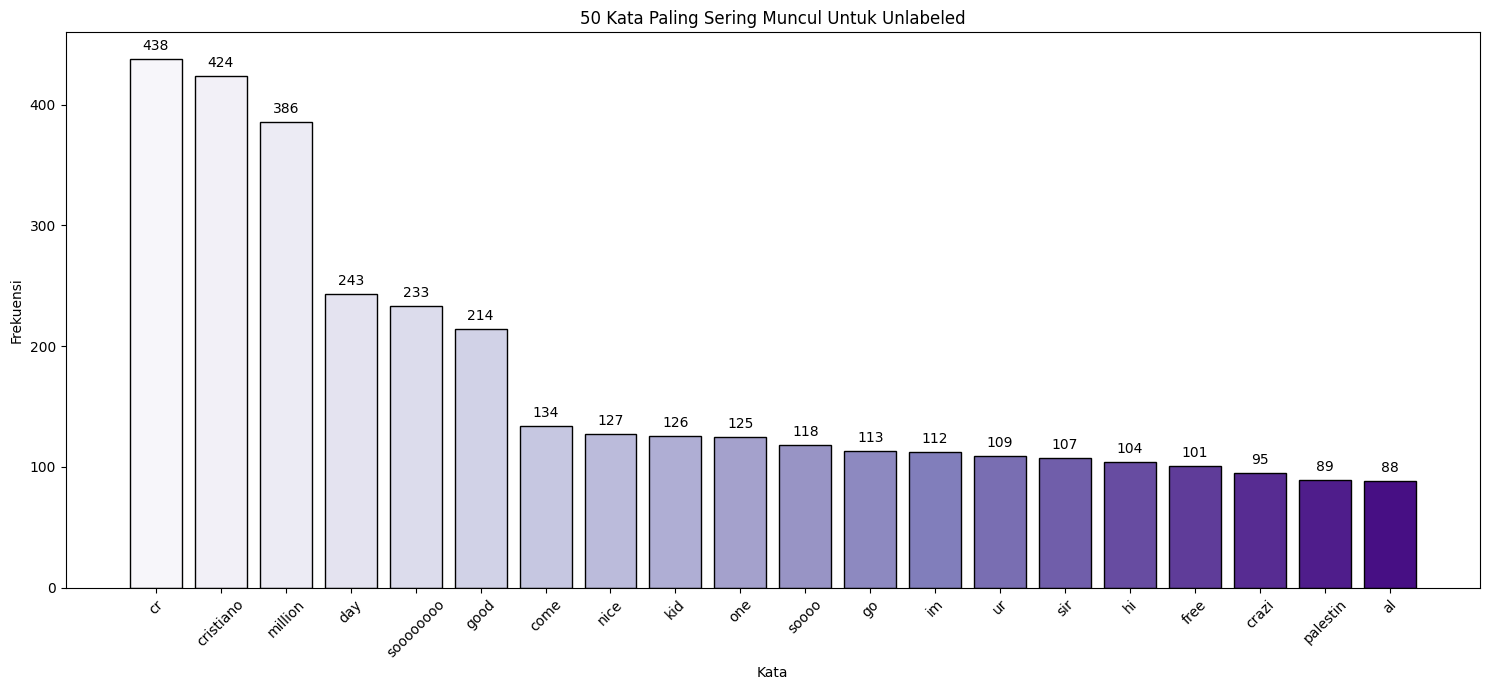

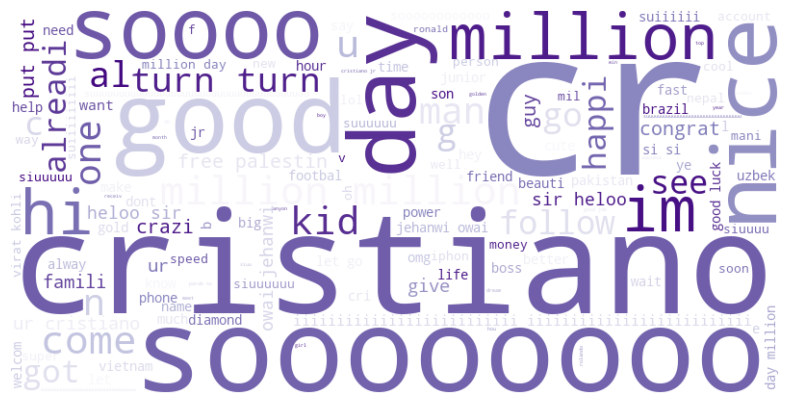

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
from nltk import download

# Download NLTK resources (run this once)
download('punkt')
download('stopwords')

# 1. Membaca data
df = pd.read_csv('nn_done_data_40000.csv')

# 2. Filter data hanya untuk label "Interaksi dengan Platform YouTube"
df = df[df['label'] == 'Unlabeled']

# 3. Preprocessing Teks
def preprocess_text(text):
    # - Case Folding
    text = text.lower()
    # - Pembersihan Data: Menghapus simbol dan angka
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Apply preprocessing to the translated_text column
df['cleaned_text'] = df['translated_text'].apply(preprocess_text)

# - Tokenization
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

# - Menggunakan stopwords bahasa Inggris
stop_words = set(stopwords.words('english'))

# - Membuang stop words
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# - Stemming
stemmer = PorterStemmer()
df['stemmed'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

# - Menggabungkan kembali menjadi string
df['final_text'] = df['stemmed'].apply(lambda x: ' '.join(x))

# 4. Menghitung frekuensi kata
text = ' '.join(df['final_text'])
words = re.findall(r'\w+', text)
word_counts = Counter(words)

# 5. Bar Chart untuk 10 kata paling sering muncul
# Set the color palette (sequential color map)
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(15, 7))
bars = plt.bar(words, counts, color=sns.color_palette("Purples", len(words)), edgecolor='black')

# Annotate bars with frequency values on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

# Customize the plot
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('50 Kata Paling Sering Muncul Untuk Unlabeled')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

# 6. Membuat Word Cloud dengan warna dasar hijau
# Fungsi untuk mengubah warna kata menjadi hijau
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Purples').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
